## Input the cleaned dataset

In [28]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

### MATPLOT SETTINGS
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

## method that counts the amount of missing values in the data frame 
def countMissing(df): 
    number = df.isnull().sum()
    return number

In [29]:
# Import the csv files and seperate at , 
df = "processed_data.csv"
responsesDf = pd.read_csv(df, sep=',')

## delete unwanted column 
responsesDf = responsesDf.drop('Unnamed: 0', axis=1)

responsesDf.head()

,music,speed,dance,folk,country,classical,musical,pop,rock,metal,...,Parents' advice,Questionnaires or polls,Internet usage,finances,shoppingCentres,brandedClothing,entertainment,looks,gadgets,healthyFood
0,5,3,2,1,2,2,1,5,5,1,...,4.0,3.0,few hours a day,3,4,5,3,3,1,3
1,4,4,2,1,1,1,2,3,5,4,...,2.0,3.0,few hours a day,3,4,1,4,2,5,2
2,5,5,2,2,3,4,5,3,5,3,...,3.0,1.0,few hours a day,2,4,1,4,3,4,2
3,5,3,2,1,1,1,1,2,2,1,...,2.0,4.0,most of the day,2,4,3,3,4,4,1
4,5,3,4,3,2,4,3,5,3,1,...,3.0,3.0,few hours a day,4,3,4,3,3,2,4


## Create segments

In [33]:
## I divided the processed data into segments
music = responsesDf.iloc[:,0:19]
movies = responsesDf.iloc[:,19:31]
phobias = responsesDf.iloc[:,31:41]
interests = responsesDf.iloc[:,41:73]
personal = responsesDf.iloc[:,73:82]

,age,height,weight,siblings,gender,hand,education,onlyChild,place
0,20,163,48,1,female,right handed,college/bachelor degree,no,village
1,19,163,58,2,female,right handed,college/bachelor degree,no,city
2,20,176,67,2,female,right handed,secondary school,no,city
3,22,172,59,1,female,right handed,college/bachelor degree,yes,city
4,20,170,59,1,female,right handed,secondary school,no,village


## Data exploration and basic charts

After first trying to visualise the whole dataset, I quickly realised that this would not be the best way. I simply have too many features for this. <br> So I decided to focus on the different segments. I started with the music dataframe and tried to see if I could find something interesting.<br> 


### Finding correlations in music

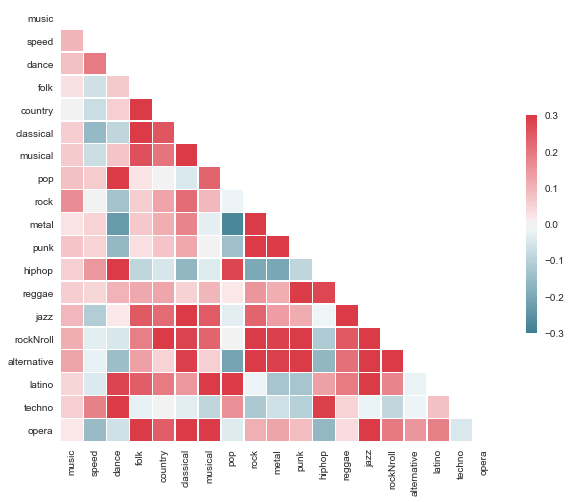

In [19]:
## use the corr() to find correlations in columns
correlations = music.corr()

def get_music_corrs(df):
    col_correlations = music.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()

music_corrs = get_music_corrs(music)

## create a heatmap to show correlation
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 8))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
_ = sb.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Music genre preferences among young people

In [47]:
## Drop the music and speed values because they don't say anything about a music genre
music_enjoyment = music["music"]
music.drop(["music"], axis=1, inplace=True)

music_speed = music["speed"]
music.drop(["speed"], axis=1, inplace=True)

In [48]:
# create dictionary mapping genre to popularity 
def get_popularity(df, genres): 
    pop = {}  ## a new object
    for i in genres:
        pop[i] = df[i].sum()/len(df.index)
    sorted_pop = dict(sorted(pop.items(), key=lambda x: x[1]))
    return sorted_pop

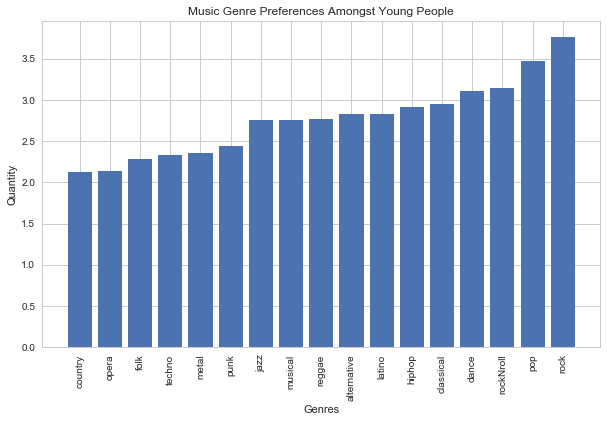

In [49]:
genres = music.columns.tolist()
genre_pop = get_popularity(music, genres)

fig, ax = plt.subplots(figsize=(10,6))

# d = plt.figure(figsize=(10, 5))
plt.bar(range(len(genre_pop)), genre_pop.values(), align='center')
plt.xticks(range(len(genre_pop)), genre_pop.keys(), rotation="vertical")

ax.set_title("Music Genre Preferences Amongst Young People")
ax.set_xlabel("Genres")
ax.set_ylabel("Quantity")
plt.show()

### What music genres do girls like?

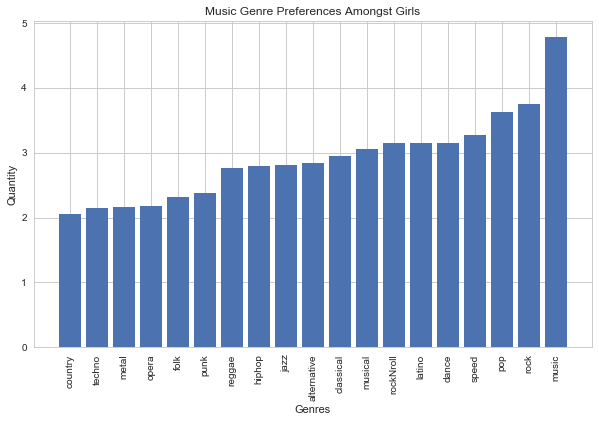

In [61]:
#### merge the music and personal dataframes 
musicAndPersonal = music.join(personal)

### filter girls 
girls = musicAndPersonal[musicAndPersonal['gender'] =='female' ]

genres = music.columns.tolist()
genre_pop = get_popularity(girls, genres)

fig, ax = plt.subplots(figsize=(10,6))

# d = plt.figure(figsize=(10, 5))
plt.bar(range(len(genre_pop)), genre_pop.values(), align='center')
plt.xticks(range(len(genre_pop)), genre_pop.keys(), rotation="vertical")

ax.set_title("Music Genre Preferences Amongst Girls")
ax.set_xlabel("Genres")
ax.set_ylabel("Quantity")
plt.show()

### What music genres do boys like?

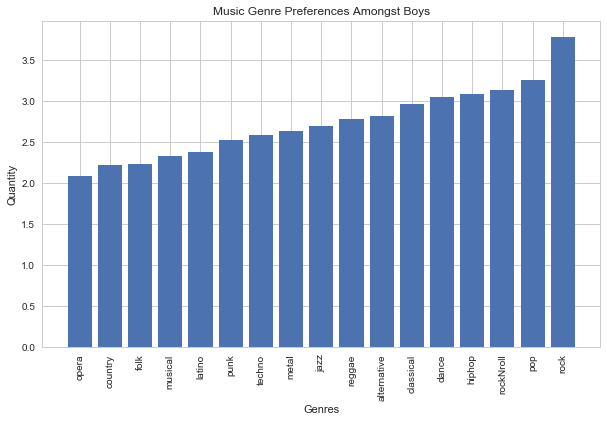

In [53]:
### filter male
boys  = musicAndPersonal[musicAndPersonal['gender'] =='male' ]

genres = music.columns.tolist()
genre_pop = get_popularity(boys, genres)

fig, ax = plt.subplots(figsize=(10,6))

# d = plt.figure(figsize=(10, 5))
plt.bar(range(len(genre_pop)), genre_pop.values(), align='center')
plt.xticks(range(len(genre_pop)), genre_pop.keys(), rotation="vertical")

ax.set_title("Music Genre Preferences Amongst Boys")
ax.set_xlabel("Genres")
ax.set_ylabel("Quantity")
plt.show()

### What is the influence of music enjoyment to the genre?

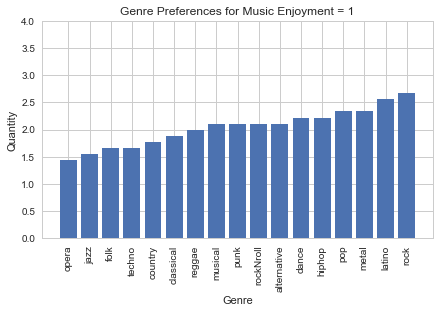

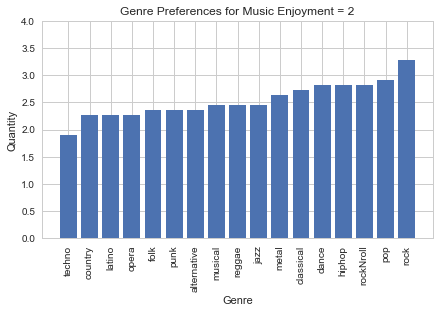

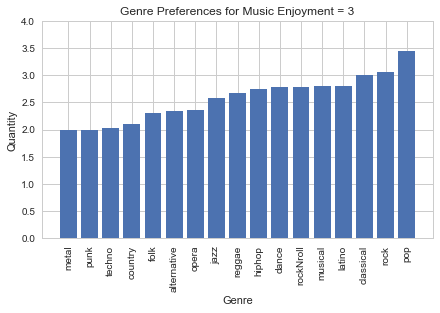

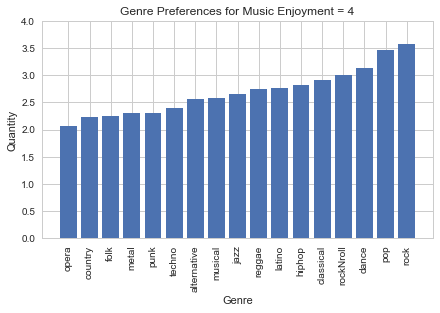

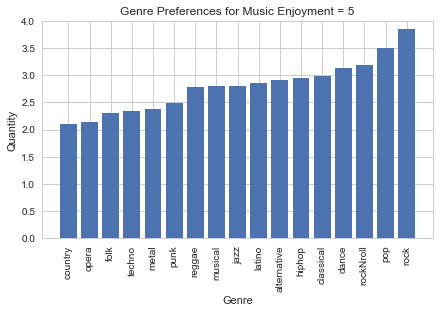

In [59]:
music = responsesDf.iloc[:,0:19]
df1 = music[music["music"]==1.0]
df2 = music[music["music"]==2.0]
df3 = music[music["music"]==3.0]
df4 = music[music["music"]==4.0]
df5 = music[music["music"]==5.0]

pref1 = get_popularity(df1, genres=genres)
pref2 = get_popularity(df2, genres=genres)
pref3 = get_popularity(df3, genres=genres)
pref4 = get_popularity(df4, genres=genres)
pref5 = get_popularity(df5, genres=genres)

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref1))), pref1.values(), align='center')
plt.xticks(range(len(pref1)), pref1.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Enjoyment = 1")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref2))), pref2.values(), align='center')
plt.xticks(range(len(pref2)), pref2.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Enjoyment = 2")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref3))), pref3.values(), align='center')
plt.xticks(range(len(pref3)), pref3.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Enjoyment = 3")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref4))), pref4.values(), align='center')
plt.xticks(range(len(pref4)), pref4.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Enjoyment = 4")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref5))), pref5.values(), align='center')
plt.xticks(range(len(pref5)), pref5.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Enjoyment = 5")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

### What is the influence of music speed to the genre?

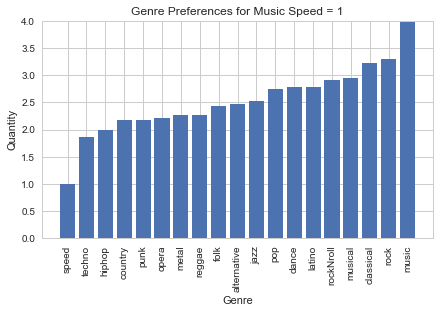

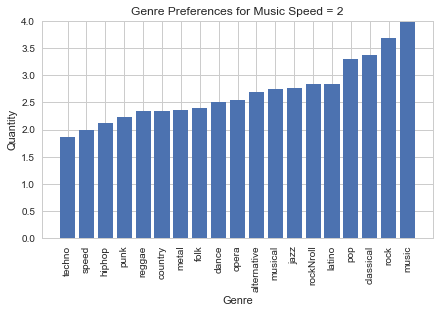

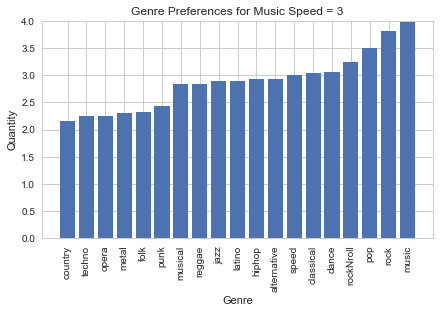

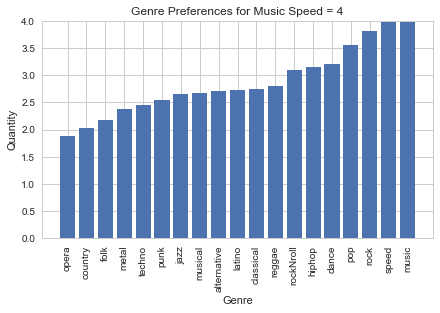

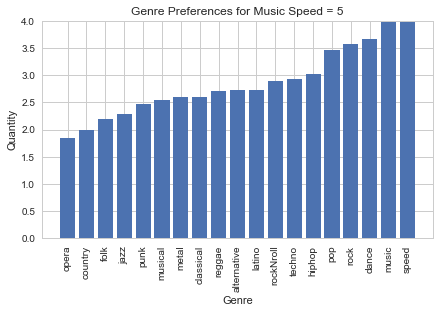

In [64]:
df1 = music[music["speed"]==1]
df2 = music[music["speed"]==2]
df3 = music[music["speed"]==3]
df4 = music[music["speed"]==4]
df5 = music[music["speed"]==5]

pref1 = get_popularity(df1, genres=genres)
pref2 = get_popularity(df2, genres=genres)
pref3 = get_popularity(df3, genres=genres)
pref4 = get_popularity(df4, genres=genres)
pref5 = get_popularity(df5, genres=genres)

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref1))), pref1.values(), align='center')
plt.xticks(range(len(pref1)), pref1.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Speed = 1")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref2))), pref2.values(), align='center')
plt.xticks(range(len(pref2)), pref2.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Speed = 2")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref3))), pref3.values(), align='center')
plt.xticks(range(len(pref3)), pref3.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Speed = 3")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref4))), pref4.values(), align='center')
plt.xticks(range(len(pref4)), pref4.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Speed = 4")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
plt.subplot()
axes = plt.gca()
axes.set_ylim([0,4])
plt.bar((range(len(pref5))), pref5.values(), align='center')
plt.xticks(range(len(pref5)), pref5.keys(), rotation="vertical")
plt.title("Genre Preferences for Music Speed = 5")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

### Do girls like math more than boys?

In [94]:
#### merge the interest and personal dataframes 
interestsAndPersonal = interests.join(personal)
interestsAndPersonal

### filter girls and boys
girls = interestsAndPersonal[interestsAndPersonal['gender'] =='female' ]
boys = interestsAndPersonal[interestsAndPersonal['gender'] =='male' ]


def calculateTotal(df): 
    total = df.mean()
    return total

girlsMath = calculateTotal(girls['math'])
boysMath = calculateTotal(boys['math'])

### Are boys more interested in politics than girls?

In [100]:
### filter girls and boys
girls = interestsAndPersonal[interestsAndPersonal['gender'] =='female' ]
boys = interestsAndPersonal[interestsAndPersonal['gender'] =='male' ]


girlsPolitics = calculateTotal(girls['politics'])
boysPolitics = calculateTotal(boys['politics'])